In [12]:
import os
import sys
import shutil

import time
import math

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import cv2

import src.childs_draw as childs_draw

In [13]:
df = childs_draw.child_draw_describe(7557, 11, True)

In [14]:
df.head()

,X,Y,Pressure,TiltX,TiltY,Time,TimeDiff,PressureDiff,XDiff,YDiff,TiltXDiff,TiltYDiff
0,668.965008,642.160065,0.518547,3353.0,-759.0,3.473039,0.015717,0.031739,-1.211225,0.105324,0.0,0.0
1,667.753782,642.265389,0.550286,3353.0,-759.0,3.488755,0.015631,-0.011475,-2.001155,-1.158563,0.0,0.0
2,665.752627,641.106825,0.538811,3353.0,-759.0,3.504387,0.015597,0.021485,-0.526620,-1.000577,0.0,0.0
3,665.226008,640.106248,0.560296,3353.0,-759.0,3.519983,0.015545,0.036378,-0.737268,-2.633099,0.0,0.0
4,664.488740,637.473149,0.596674,3353.0,-759.0,3.535528,0.015730,0.011475,-0.421296,-3.739000,0.0,0.0


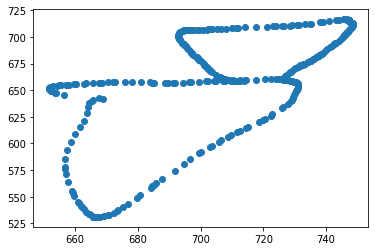

In [15]:
plt.scatter(df['X'], df['Y'])

In [16]:
limits = [df.head(1).index[0], df.tail(1).index[0]] + df[df.TimeDiff > df.TimeDiff.std()].index.tolist()
limits = np.unique(list(sorted(limits))).tolist()
limits

[0, 166, 367]

In [17]:
index = 0
for i in range(len(limits) - 1):
    start = limits[i]
    end = limits[i+1]
    
    sub_df = df.iloc[start:end]
    break

In [18]:
BLOCK = 5

counter = 0
values = []

for i in sub_df.index:
    if i + 2 * BLOCK < len(sub_df.index):
        x1, y1 = sub_df.iloc[i][['X', 'Y']]
        
        deg = math.degrees(math.atan(y1/x1))
        a = 0
        
        for j in range(1, BLOCK):
            x2, y2 = sub_df.iloc[i+j][['X', 'Y']]
            a += math.degrees(math.atan(y2/y1)) - deg
                
        b = a
        
        for j in range(5, 2 * BLOCK):
            x2, y2 = sub_df.iloc[i+j][['X', 'Y']]
            b += math.degrees(math.atan(y2/x2)) - deg
        
        a = a/BLOCK
        b = b/(2 * BLOCK)
        
        if abs(b - a) > 2:
            counter += 1
        
        values.append(abs(b - a))


(counter, np.array(values).max())

(38, 2.619094892588523)

In [117]:
import matplotlib.pyplot as plt

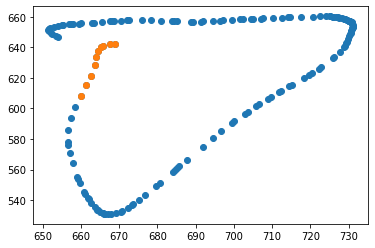

In [19]:
plt.scatter(sub_df['X'], sub_df['Y'])
plt.scatter(sub_df.iloc[:10]['X'], sub_df.iloc[:10]['Y'])

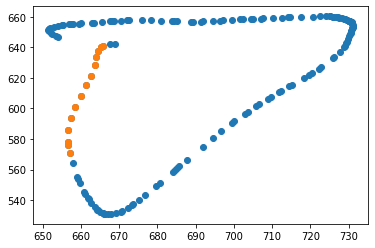

In [157]:
BLOCK = 5

counter = 0
values = []
sx = []
sy = []

for i in sub_df.index:
    if i + 2 * BLOCK < len(sub_df.index):
        x1, y1 = sub_df.iloc[i][['X', 'Y']]
        
        deg = math.degrees(math.atan(y1/x1))
        a = 0
        
        for j in range(1, BLOCK):
            x2, y2 = sub_df.iloc[i+j][['X', 'Y']]
            a += math.degrees(math.atan(y2/x1)) - deg
                
        b = a
        
        for j in range(5, 2 * BLOCK):
            x2, y2 = sub_df.iloc[i+j][['X', 'Y']]
            b += math.degrees(math.atan(y2/x2)) - deg
        
        a = a/BLOCK
        b = b/(2 * BLOCK)
        
        if abs(b - a) > 0.5:
            counter += 1
            sx.append(x1)
            sy.append(y1)
        
        values.append(abs(b - a))

plt.scatter(sub_df['X'], sub_df['Y'])
plt.scatter(sx, sy)

,0,1
0,0.049124,-0.003390
1,0.015469,-0.064015
2,-0.043457,-0.148587
3,-0.107570,-0.214089
4,-0.168876,-0.274263
...,...,...
155,0.013874,0.003080
156,-0.001519,-0.010788
157,-0.011556,-0.031656
158,-0.013119,-0.034765


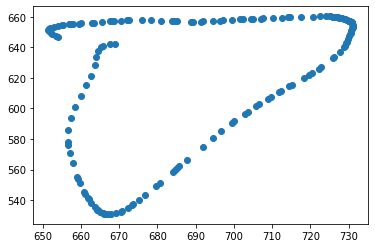

In [160]:
BLOCK = 3

counter = 0
values = []
sx = []
sy = []

for i in sub_df.index:
    if i + 2 * BLOCK < len(sub_df.index):
        x1, y1 = sub_df.iloc[i][['X', 'Y']]
        
        deg = math.degrees(math.atan(y1/x1))
        a = 0
        
        for j in range(1, BLOCK):
            x2, y2 = sub_df.iloc[i+j][['X', 'Y']]
            a += math.degrees(math.atan(y2/x2)) - deg
                
        b = a
        
        for j in range(5, 2 * BLOCK):
            x2, y2 = sub_df.iloc[i+j][['X', 'Y']]
            b += math.degrees(math.atan(y2/x2)) - deg
        
        a = a/BLOCK
        b = b/(2*BLOCK)
        
        if abs(b - a) > 0.5:
            counter += 1
            sx.append(x1)
            sy.append(y1)
        
        values.append([a,b])

plt.scatter(sub_df['X'], sub_df['Y'])
plt.scatter(sx, sy)
counter
values = np.array(values)
pd.DataFrame(values)

4

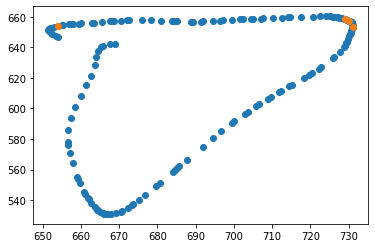

In [20]:
BLOCK = 5

counter = 0
values = []
sx = []
sy = []

def get_angle(x1, y1, x2, y2):
    if (x1 == x2):
        if y2 >= y1:
            return 90
        return -90
    
    return math.degrees(math.atan(y2-y1/x2-x1))

i = sub_df.head(1).index[0]
while i < sub_df.tail(2 * BLOCK).index[0]:
    if i + 2 * BLOCK < len(sub_df.index):
        x1, y1 = sub_df.iloc[i][['X', 'Y']]
        
        a = 0
        
        for j in range(1, BLOCK):
            x2, y2 = sub_df.iloc[i+j][['X', 'Y']]
            a += get_angle(x1, y1, x2, y2)
                
        b = a
        
        for j in range(5, 2 * BLOCK):
            x2, y2 = sub_df.iloc[i+j][['X', 'Y']]
            b += get_angle(x1, y1, x2, y2)
        
        a = a/BLOCK
        b = b/(2*BLOCK)
        
        if abs(b - a) > 10:
            counter += 1
            sx.append(x1)
            sy.append(y1)
            
        values.append([a,b])
    
    i += BLOCK

plt.scatter(sub_df['X'], sub_df['Y'])
plt.scatter(sx, sy)

pd.DataFrame(np.array(values))

counter

In [191]:
# need Delta X

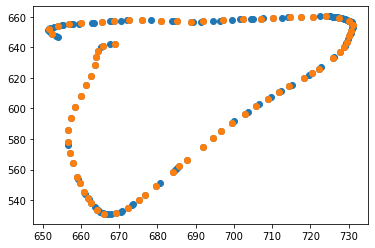

In [21]:
def get_angle(x1, y1, x2, y2):
    if (x1 == x2):
        if y2 >= y1:
            return 90
        return -90
    
    return math.degrees(math.atan(y2-y1/x2-x1))

def get_distance(x1, y1, x2, y2):
    return ((x2-x1)**2 + (y2-y1)**2) ** 0.5

def get_next_block(df: pd.DataFrame, current, distance: float):
    if current not in df.index.tolist():
        return None
    
    x2, y2 = x1, y1 = df.iloc[current][['X', 'Y']]
    
    i = current
    while get_distance(x1, y1, x2, y2) < distance:
        i += 1
        if i not in df.index.tolist():
            return i - 1
        
        x2, y2 = df.iloc[i][['X', 'Y']]
    
    return i

DELTA_XY = 3

sx = []
sy = []

start_index = sub_df.head(1).index[0]

end_index = get_next_block(sub_df, start_index, DELTA_XY)

while start_index < end_index:
    x1, y1 = sub_df.iloc[start_index][['X', 'Y']]
    sx.append(x1)
    sy.append(y1)
    
    start_index = end_index
    end_index = get_next_block(sub_df, start_index, DELTA_XY)

plt.scatter(sub_df['X'], sub_df['Y'])
plt.scatter(sx, sy)

None

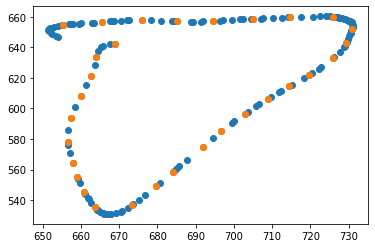

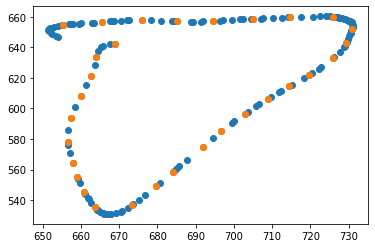

In [41]:
def get_angle(x1, y1, x2, y2):
    if (x1 == x2):
        if y2 >= y1:
            return 90
        return -90
    
    return math.degrees(math.atan(y2-y1/x2-x1))

def get_distance(x1, y1, x2, y2):
    return ((x2-x1)**2 + (y2-y1)**2) ** 0.5

def get_next_block(df: pd.DataFrame, current, distance: float):
    if current not in df.index.tolist():
        return None
    
    x2, y2 = x1, y1 = df.iloc[current][['X', 'Y']]
    
    i = current
    while get_distance(x1, y1, x2, y2) < distance:
        i += 1
        if i not in df.index.tolist():
            return i - 1
        
        x2, y2 = df.iloc[i][['X', 'Y']]
    
    return i

DELTA_XY = 9
BLOCK = 1

sx, sy = [], []
sx2, sy2 = [], []

start_index = sub_df.head(1).index[0]

end_index = get_next_block(sub_df, start_index, DELTA_XY)

while start_index < end_index:
    x1, y1 = sub_df.iloc[start_index][['X', 'Y']]
    sx.append(x1)
    sy.append(y1)
    
    start_index = end_index
    end_index = get_next_block(sub_df, start_index, DELTA_XY)

# sx2 sy2
start_index = sub_df.head(1).index[0]

end_index = start_index
counter = BLOCK
while counter > 0:
    end_index = get_next_block(sub_df, end_index, DELTA_XY)
    counter -= 1

while start_index < end_index and end_index != None:
    x1, y1 = sub_df.iloc[start_index][['X', 'Y']]
    sx2.append(x1)
    sy2.append(y1)
    
    start_index = end_index
    
    counter = BLOCK
    while counter > 0 and end_index != None:
        end_index = get_next_block(sub_df, end_index, DELTA_XY)
        counter -= 1


plt.scatter(sub_df['X'], sub_df['Y'])
plt.scatter(sx, sy)
plt.show()

plt.scatter(sub_df['X'], sub_df['Y'])
plt.scatter(sx2, sy2)
plt.show()

None

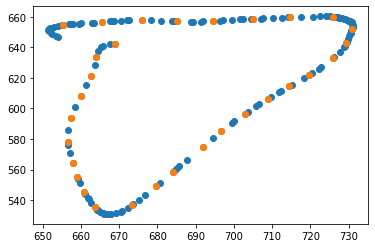

In [42]:
def get_angle(x1, y1, x2, y2):
    if (x1 == x2):
        if y2 >= y1:
            return 90
        return -90
    
    return math.degrees(math.atan(y2-y1/x2-x1))

def get_distance(x1, y1, x2, y2):
    return ((x2-x1)**2 + (y2-y1)**2) ** 0.5

def get_next_block(df: pd.DataFrame, current, distance: float):
    if current not in df.index.tolist():
        return None
    
    x2, y2 = x1, y1 = df.iloc[current][['X', 'Y']]
    
    i = current
    while get_distance(x1, y1, x2, y2) < distance:
        i += 1
        if i not in df.index.tolist():
            return i - 1
        
        x2, y2 = df.iloc[i][['X', 'Y']]
    
    return i

DELTA_XY = 9

sx, sy = [], []

start_index = sub_df.head(1).index[0]

end_index = get_next_block(sub_df, start_index, DELTA_XY)

while start_index < end_index:
    x1, y1 = sub_df.iloc[start_index][['X', 'Y']]
    sx.append(x1)
    sy.append(y1)
    
    start_index = end_index
    end_index = get_next_block(sub_df, start_index, DELTA_XY)

plt.scatter(sub_df['X'], sub_df['Y'])
plt.scatter(sx, sy)
plt.show()

None

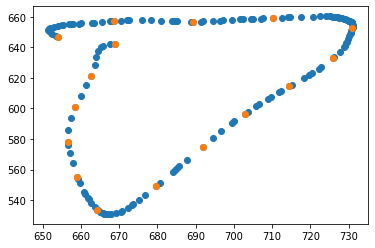

In [54]:
def get_angle(x1, y1, x2, y2):
    if (x1 == x2):
        if y2 >= y1:
            return 90
        return -90
    
    return math.degrees(math.atan(y2-y1/x2-x1))

def get_distance(x1, y1, x2, y2):
    return math.sqrt(math.pow(x2-x1, 2) + math.pow(y2-y1, 2))

def get_next_block(df: pd.DataFrame, current, distance: float):
    if current not in df.index.tolist():
        return None
    
    x2, y2 = x1, y1 = df.iloc[current][['X', 'Y']]
    
    i = current
    while get_distance(x1, y1, x2, y2) < distance:
        i += 1
        if i not in df.index.tolist():
            return i - 1
        
        x2, y2 = df.iloc[i][['X', 'Y']]
    
    return i

DELTA_XY = 20

start_index = sub_df.head(1).index[0]

si = [start_index]

end_index = get_next_block(sub_df, start_index, DELTA_XY)

while start_index < end_index:
    si.append(end_index)
    x1, y1 = sub_df.iloc[start_index][['X', 'Y']]
    
    start_index = end_index
    end_index = get_next_block(sub_df, start_index, DELTA_XY)

si.append(sub_df.tail(1).index[0])

si = np.unique(np.array(si)).tolist()

plt.scatter(sub_df['X'], sub_df['Y'])
plt.scatter(sub_df.iloc[si]['X'], sub_df.iloc[si]['Y'])
plt.show()

None

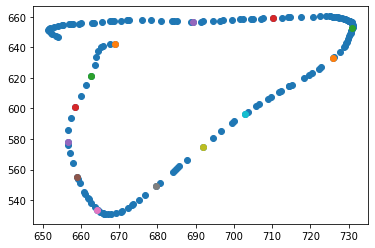

In [56]:
counter = 0
values = []

plt.scatter(sub_df['X'], sub_df['Y'])

for i in range(len(si)-2):
    
    plt.scatter(sub_df.iloc[si[i]]['X'], sub_df.iloc[si[i]]['Y'])    

5

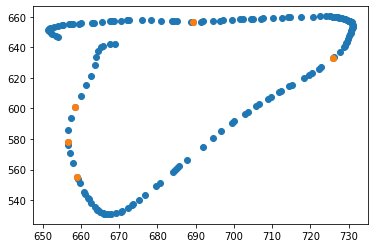

In [70]:
counter = 0
values = []

con_x, con_y = [], []

for i in range(len(si)-2):
    x1, y1 = sub_df.iloc[si[i]][['X', 'Y']]
        
    deg = math.degrees(math.atan(y1/x1))
    a = 0
    
    way = sub_df.iloc[si[i]:si[i+1]].index
    for row_i in way:
        row = sub_df.iloc[row_i]
        
        x2, y2 = row[['X', 'Y']]
        a += math.degrees(math.atan(y2/x2)) - deg
    
    a /= len(way)
    
    way = sub_df.iloc[si[i]:si[i+2]].index
    for row_i in way:
        row = sub_df.iloc[row_i]
        
        x2, y2 = row[['X', 'Y']]
        b += math.degrees(math.atan(y2/x2)) - deg
    
    b /= len(way)
            
    if abs(b - a) > 0.5:
        counter += 1
        con_x.append(x1)
        con_y.append(y1)
        
    values.append([a,b])

plt.scatter(sub_df['X'], sub_df['Y'])
plt.scatter(con_x, con_y)

counter

5

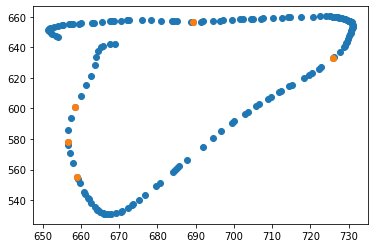

In [71]:
def get_angle(x1, y1, x2, y2):
    if (x1 == x2):
        if y2 >= y1:
            return 90
        return -90
    
    return math.degrees(math.atan(y2-y1/x2-x1))

def get_distance(x1, y1, x2, y2):
    return math.sqrt(math.pow(x2-x1, 2) + math.pow(y2-y1, 2))

def get_next_block(df: pd.DataFrame, current, distance: float):
    if current not in df.index.tolist():
        return None
    
    x2, y2 = x1, y1 = df.iloc[current][['X', 'Y']]
    
    i = current
    while get_distance(x1, y1, x2, y2) < distance:
        i += 1
        if i not in df.index.tolist():
            return i - 1
        
        x2, y2 = df.iloc[i][['X', 'Y']]
    
    return i

DELTA_XY = 20

start_index = sub_df.head(1).index[0]

si = [start_index]

end_index = get_next_block(sub_df, start_index, DELTA_XY)

while start_index < end_index:
    si.append(end_index)
    x1, y1 = sub_df.iloc[start_index][['X', 'Y']]
    
    start_index = end_index
    end_index = get_next_block(sub_df, start_index, DELTA_XY)

si.append(sub_df.tail(1).index[0])

si = np.unique(np.array(si)).tolist()

counter = 0
values = []

con_x, con_y = [], []

for i in range(len(si)-2):
    x1, y1 = sub_df.iloc[si[i]][['X', 'Y']]
        
    deg = math.degrees(math.atan(y1/x1))
    a = 0
    
    way = sub_df.iloc[si[i]:si[i+1]].index
    for row_i in way:
        row = sub_df.iloc[row_i]
        
        x2, y2 = row[['X', 'Y']]
        a += math.degrees(math.atan(y2/x2)) - deg
    
    a /= len(way)
    
    way = sub_df.iloc[si[i]:si[i+2]].index
    for row_i in way:
        row = sub_df.iloc[row_i]
        
        x2, y2 = row[['X', 'Y']]
        b += math.degrees(math.atan(y2/x2)) - deg
    
    b /= len(way)
            
    if abs(b - a) > 0.5:
        counter += 1
        con_x.append(x1)
        con_y.append(y1)
        
    values.append([a,b])

plt.scatter(sub_df['X'], sub_df['Y'])
plt.scatter(con_x, con_y)

counter

5

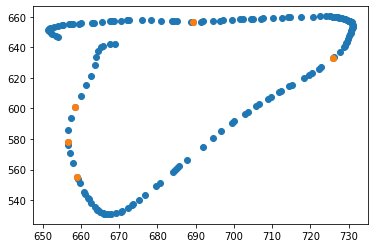

In [73]:
# functions
def get_angle(x1, y1, x2, y2):
    if (x1 == x2):
        if y2 >= y1:
            return 90
        return -90
    
    return math.degrees(math.atan(y2-y1/x2-x1))

def get_distance(x1, y1, x2, y2):
    return math.sqrt(math.pow(x2-x1, 2) + math.pow(y2-y1, 2))

def get_next_block(df: pd.DataFrame, current, distance: float):
    if current not in df.index.tolist():
        return None
    
    x2, y2 = x1, y1 = df.iloc[current][['X', 'Y']]
    
    i = current
    while get_distance(x1, y1, x2, y2) < distance:
        i += 1
        if i not in df.index.tolist():
            return i - 1
        
        x2, y2 = df.iloc[i][['X', 'Y']]
    
    return i

# Flags
DELTA_XY = 20

# savers
counter = 0

con_x, con_y = [], []

# Step 1
start_index = sub_df.head(1).index[0]

si = [start_index]

end_index = get_next_block(sub_df, start_index, DELTA_XY)

while start_index < end_index:
    si.append(end_index)
    x1, y1 = sub_df.iloc[start_index][['X', 'Y']]
    
    start_index = end_index
    end_index = get_next_block(sub_df, start_index, DELTA_XY)

si.append(sub_df.tail(1).index[0])

si = np.unique(np.array(si)).tolist()

# Step 2
for i in range(len(si)-2):
    x1, y1 = sub_df.iloc[si[i]][['X', 'Y']]
        
    deg = math.degrees(math.atan(y1/x1))
    a = 0
    
    way = sub_df.iloc[si[i]:si[i+1]].index
    for row_i in way:
        row = sub_df.iloc[row_i]
        
        x2, y2 = row[['X', 'Y']]
        a += math.degrees(math.atan(y2/x2)) - deg
    
    a /= len(way)
    
    way = sub_df.iloc[si[i]:si[i+2]].index
    for row_i in way:
        row = sub_df.iloc[row_i]
        
        x2, y2 = row[['X', 'Y']]
        b += math.degrees(math.atan(y2/x2)) - deg
    
    b /= len(way)
            
    if abs(b - a) > 0.5:
        counter += 1
        con_x.append(x1)
        con_y.append(y1)
    
    
plt.scatter(sub_df['X'], sub_df['Y'])
plt.scatter(con_x, con_y)

counter

5

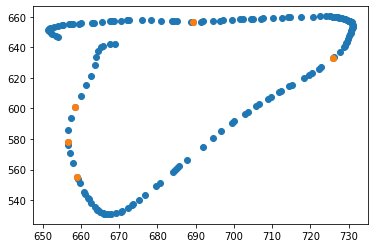

In [76]:
# functions
def get_angle(x1, y1, x2, y2):
    if (x1 == x2):
        if y2 >= y1:
            return 90
        return -90
    
    return math.degrees(math.atan(y2-y1/x2-x1))

def get_distance(x1, y1, x2, y2):
    return math.sqrt(math.pow(x2-x1, 2) + math.pow(y2-y1, 2))

def get_next_block(df: pd.DataFrame, current, distance: float):
    if current not in df.index.tolist():
        return None
    
    x2, y2 = x1, y1 = df.iloc[current][['X', 'Y']]
    
    i = current
    while get_distance(x1, y1, x2, y2) < distance:
        i += 1
        if i not in df.index.tolist():
            return i - 1
        
        x2, y2 = df.iloc[i][['X', 'Y']]
    
    return i

# Flags
DELTA_XY = 20
ANGLE_DIFF = 0.5

# savers
counter = 0

con_x, con_y = [], []

# Step 1
start_index = sub_df.head(1).index[0]

si = [start_index]

end_index = get_next_block(sub_df, start_index, DELTA_XY)

while start_index < end_index:
    si.append(end_index)
    x1, y1 = sub_df.iloc[start_index][['X', 'Y']]
    
    start_index = end_index
    end_index = get_next_block(sub_df, start_index, DELTA_XY)

si.append(sub_df.tail(1).index[0])

si = np.unique(np.array(si)).tolist()

# Step 2
for i in range(len(si)-2):
    x1, y1 = sub_df.iloc[si[i]][['X', 'Y']]
        
    deg = math.degrees(math.atan(y1/x1))
    a = 0
    
    way = sub_df.iloc[si[i]:si[i+1]].index
    for row_i in way:
        row = sub_df.iloc[row_i]
        
        x2, y2 = row[['X', 'Y']]
        a += math.degrees(math.atan(y2/x2)) - deg
    
    a /= len(way)
    
    way = sub_df.iloc[si[i]:si[i+2]].index
    for row_i in way:
        row = sub_df.iloc[row_i]
        
        x2, y2 = row[['X', 'Y']]
        b += math.degrees(math.atan(y2/x2)) - deg
    
    b /= len(way)
            
    if abs(b - a) > ANGLE_DIFF:
        counter += 1
        con_x.append(x1)
        con_y.append(y1)
    
    
plt.scatter(sub_df['X'], sub_df['Y'])
plt.scatter(con_x, con_y)

counter

5

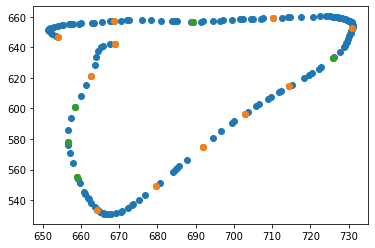

In [84]:
# functions
def get_angle(x1, y1, x2, y2):
    if (x1 == x2):
        if y2 >= y1:
            return 90
        return -90
    
    return math.degrees(math.atan(y2-y1/x2-x1))

def get_distance(x1, y1, x2, y2):
    return math.sqrt(math.pow(x2-x1, 2) + math.pow(y2-y1, 2))

def get_next_block(df: pd.DataFrame, current, distance: float):
    if current not in df.index.tolist():
        return None
    
    x2, y2 = x1, y1 = df.iloc[current][['X', 'Y']]
    
    i = current
    while get_distance(x1, y1, x2, y2) < distance:
        i += 1
        if i not in df.index.tolist():
            return i - 1
        
        x2, y2 = df.iloc[i][['X', 'Y']]
    
    return i

# Flags
DELTA_XY = 20
ANGLE_DIFF = 0.5

# savers
counter = 0

con_x, con_y = [], []

# Step 1
start_index = sub_df.head(1).index[0]

si = [start_index]

end_index = get_next_block(sub_df, start_index, DELTA_XY)

while start_index < end_index:
    si.append(end_index)
    x1, y1 = sub_df.iloc[start_index][['X', 'Y']]
    
    start_index = end_index
    end_index = get_next_block(sub_df, start_index, DELTA_XY)

si.append(sub_df.tail(1).index[0])

si = np.unique(np.array(si)).tolist()

# Step 2
for i in range(len(si)-2):
    x1, y1 = sub_df.iloc[si[i]][['X', 'Y']]
        
    deg = math.degrees(math.atan(y1/x1))
    a = 0
    
    way = sub_df.iloc[si[i]:si[i+1]].index
    for row_i in way:
        row = sub_df.iloc[row_i]
        
        x2, y2 = row[['X', 'Y']]
        a += math.degrees(math.atan(y2/x2)) - deg
    
    a /= len(way)
    
    way = sub_df.iloc[si[i]:si[i+2]].index
    for row_i in way:
        row = sub_df.iloc[row_i]
        
        x2, y2 = row[['X', 'Y']]
        b += math.degrees(math.atan(y2/x2)) - deg
    
    b /= len(way)
            
    if abs(b - a) > ANGLE_DIFF:
        counter += 1
        con_x.append(x1)
        con_y.append(y1)
    
    
plt.scatter(sub_df['X'], sub_df['Y']) # all
plt.scatter(sub_df.iloc[si]['X'], sub_df.iloc[si]['Y']) # blocks
plt.scatter(con_x, con_y) # counted

counter

0 165
7 165
10 165
13 165
17 165
26 165
43 165
50 165
55 165
63 165
70 165
84 165
118 165
131 165
142 165
165 165


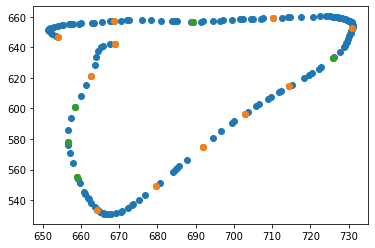

5
166 366
167 366
168 366
169 366
170 366
171 366
172 366
173 366
174 366
175 366
176 366
177 366
178 366
179 366
180 366
181 366
182 366
183 366
184 366
185 366
186 366
187 366
188 366
189 366
190 366
191 366
192 366
193 366
194 366
195 366
196 366
197 366
198 366
199 366
200 366
201 366


IndexError: single positional indexer is out-of-bounds

In [90]:
# functions
def get_angle(x1, y1, x2, y2):
    if (x1 == x2):
        if y2 >= y1:
            return 90
        return -90
    
    return math.degrees(math.atan(y2-y1/x2-x1))

def get_distance(x1, y1, x2, y2):
    return math.sqrt(math.pow(x2-x1, 2) + math.pow(y2-y1, 2))

def get_next_block(sub_df: pd.DataFrame, current, distance: float):
    if current not in sub_df.index.tolist():
        return None
        
    x2, y2 = x1, y1 = sub_df.iloc[current][['X', 'Y']]
    
    i = current
    while get_distance(x1, y1, x2, y2) < distance:
        i += 1
        if i not in sub_df.index.tolist():
            return i - 1
        
        x2, y2 = df.iloc[i][['X', 'Y']]
    
    return i

# Flags
DELTA_XY = 20
ANGLE_DIFF = 0.5

def count_lines_in_sub_draw(sub_df):
    # savers
    counter = 0

    con_x, con_y = [], []

    # Step 1
    start_index = sub_df.head(1).index[0]

    si = [start_index]

    end_index = get_next_block(sub_df, start_index, DELTA_XY)

    while start_index < end_index:
        si.append(end_index)
        x1, y1 = sub_df.iloc[start_index][['X', 'Y']]

        start_index = end_index
        end_index = get_next_block(sub_df, start_index, DELTA_XY)

    si.append(sub_df.tail(1).index[0])

    si = np.unique(np.array(si)).tolist()

    # Step 2
    for i in range(len(si)-2):
        x1, y1 = sub_df.iloc[si[i]][['X', 'Y']]

        deg = math.degrees(math.atan(y1/x1))
        a = b = 0

        way = sub_df.iloc[si[i]:si[i+1]].index
        for row_i in way:
            row = sub_df.iloc[row_i]

            x2, y2 = row[['X', 'Y']]
            a += math.degrees(math.atan(y2/x2)) - deg

        a /= len(way)

        way = sub_df.iloc[si[i]:si[i+2]].index
        for row_i in way:
            row = sub_df.iloc[row_i]

            x2, y2 = row[['X', 'Y']]
            b += math.degrees(math.atan(y2/x2)) - deg

        b /= len(way)

        if abs(b - a) > ANGLE_DIFF:
            counter += 1
            con_x.append(x1)
            con_y.append(y1)


    plt.scatter(sub_df['X'], sub_df['Y']) # all
    plt.scatter(sub_df.iloc[si]['X'], sub_df.iloc[si]['Y']) # blocks
    plt.scatter(con_x, con_y) # counted
    plt.show()

    return counter

counter = 0
index = 0

for i in range(len(limits) - 1):
    start = limits[i]
    end = limits[i+1]
    
    sub_df = df.iloc[start:end]
    
    sub_counter = count_lines_in_sub_draw(sub_df)
    print(sub_counter)
        
    counter += sub_counter

counter

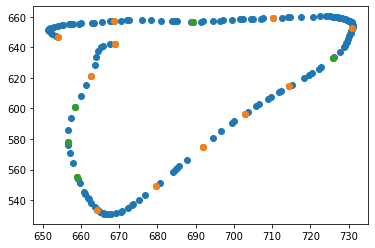

sub_counter: 5


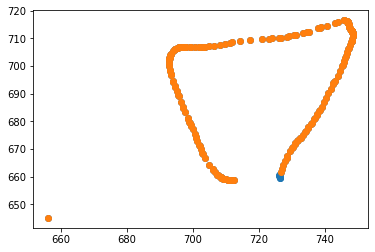

sub_counter: 0


5

In [123]:
# functions
def get_angle(x1, y1, x2, y2):
    if (x1 == x2):
        if y2 >= y1:
            return 90
        return -90
    
    return math.degrees(math.atan(y2-y1/x2-x1))

def get_distance(x1, y1, x2, y2):
    return math.sqrt(math.pow(x2-x1, 2) + math.pow(y2-y1, 2))

def get_next_block(sub_df: pd.DataFrame, current, distance: float):
    if current not in sub_df.index.tolist():
        return None
            
    x2, y2 = x1, y1 = sub_df.iloc[current][['X', 'Y']]
    
    for i in sub_df.iloc[current:].tail(-1).index:
        x2, y2 = df.iloc[i][['X', 'Y']]
        if get_distance(x1, y1, x2, y2) >= distance:
            return i
    return sub_df.tail(1).index[0]

# Flags
DELTA_XY = 20
ANGLE_DIFF = 0.5

def count_lines_in_sub_draw(sub_df):
    # savers
    counter = 0

    con_x, con_y = [], []

    # Step 1
    start_index = sub_df.head(1).index[0]

    si = [start_index]

    end_index = get_next_block(sub_df, start_index, DELTA_XY)
    
    while start_index < end_index:
        si.append(end_index)
        x1, y1 = sub_df.iloc[start_index][['X', 'Y']]

        start_index = end_index
        end_index = get_next_block(sub_df, start_index, DELTA_XY)

    si.append(sub_df.tail(1).index[0])

    si = np.unique(np.array(si)).tolist()

    # Step 2
    for i in range(len(si)-2):
        x1, y1 = sub_df.iloc[si[i]][['X', 'Y']]

        deg = math.degrees(math.atan(y1/x1))
        a = b = 0

        way = sub_df.iloc[si[i]:si[i+1]].index
        for row_i in way:
            row = sub_df.iloc[row_i]

            x2, y2 = row[['X', 'Y']]
            a += math.degrees(math.atan(y2/x2)) - deg

        a /= len(way)

        way = sub_df.iloc[si[i]:si[i+2]].index
        for row_i in way:
            row = sub_df.iloc[row_i]

            x2, y2 = row[['X', 'Y']]
            b += math.degrees(math.atan(y2/x2)) - deg

        b /= len(way)

        if abs(b - a) > ANGLE_DIFF:
            counter += 1
            con_x.append(x1)
            con_y.append(y1)


    plt.scatter(sub_df['X'], sub_df['Y']) # all
    plt.scatter(sub_df.iloc[si]['X'], sub_df.iloc[si]['Y']) # blocks
    plt.scatter(con_x, con_y) # counted
    plt.show()

    return counter

counter = 0
index = 0

for i in range(len(limits) - 1):
    start = limits[i]
    end = limits[i+1]
    
    sub_df = df.iloc[start:end].copy()
    sub_df.index = range(len(sub_df.index))
        
    sub_counter = count_lines_in_sub_draw(sub_df)
    print('sub_counter: ' + str(sub_counter))
        
    counter += sub_counter

counter

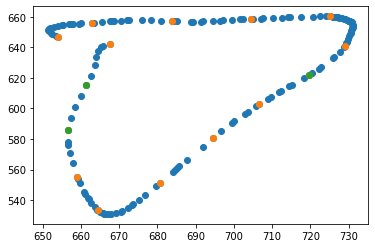

sub_counter: 3


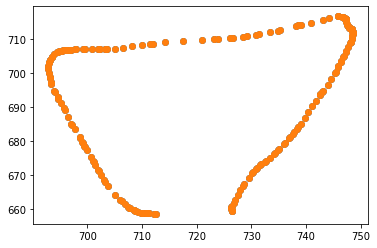

sub_counter: 0


3

In [131]:
# Make it simple - Need to fix

# functions
def get_angle(x1, y1, x2, y2):
    if (x1 == x2):
        if y2 >= y1:
            return 90
        return -90
    
    return math.degrees(math.atan(y2-y1/x2-x1))

def get_distance(x1, y1, x2, y2):
    return math.sqrt(math.pow(x2-x1, 2) + math.pow(y2-y1, 2))

def get_next_block(sub_df: pd.DataFrame, current, distance: float):
    if current not in sub_df.index.tolist():
        return None
            
    x2, y2 = x1, y1 = sub_df.iloc[current][['X', 'Y']]
    
    for i in range(current+1, len(sub_df)):
        x2, y2 = df.iloc[i][['X', 'Y']]
        if get_distance(x1, y1, x2, y2) >= distance:
            return i
    return len(sub_df) - 1

# Flags
DELTA_XY = 20
ANGLE_DIFF = 0.5

def count_lines_in_sub_draw(sub_df):
    # savers
    counter = 0

    con_x, con_y = [], []

    # Step 1
    si = [0]
    start_index = 0

    end_index = get_next_block(sub_df, start_index, DELTA_XY)
    
    while start_index < end_index:
        si.append(end_index)
        x1, y1 = sub_df.iloc[start_index][['X', 'Y']]

        start_index = end_index
        end_index = get_next_block(sub_df, start_index, DELTA_XY)

    si.append(sub_df.tail(1).index[0])

    si = np.unique(np.array(si)).tolist()

    # Step 2
    for i in range(len(si)-2):
        x1, y1 = sub_df.iloc[si[i]][['X', 'Y']]

        deg = math.degrees(math.atan(y1/x1))
        a = b = 0
        
        way = range(si[i], si[i+1] + 1)

        for row_i in way:
            row = sub_df.iloc[row_i]

            x2, y2 = row[['X', 'Y']]
            a += math.degrees(math.atan(y2/x2)) - deg

        a /= len(way)

        way = range(si[i], si[i+2] + 1)
        for row_i in way:
            row = sub_df.iloc[row_i]

            x2, y2 = row[['X', 'Y']]
            b += math.degrees(math.atan(y2/x2)) - deg

        b /= len(way)

        if abs(b - a) > ANGLE_DIFF:
            counter += 1
            con_x.append(x1)
            con_y.append(y1)


    plt.scatter(sub_df['X'], sub_df['Y']) # all
    plt.scatter(sub_df.iloc[si]['X'], sub_df.iloc[si]['Y']) # blocks
    plt.scatter(con_x, con_y) # counted
    plt.show()

    return counter

counter = 0
index = 0

for i in range(len(limits) - 1):
    start = limits[i]
    end = limits[i+1]
    
    sub_df = df.iloc[start:end].copy()
    sub_df.index = range(len(sub_df.index))
    
    sub_df = sub_df.iloc[1:]
    sub_df.index = range(len(sub_df.index))
        
    sub_counter = count_lines_in_sub_draw(sub_df)
    print('sub_counter: ' + str(sub_counter))
        
    counter += sub_counter

counter

Need to fix

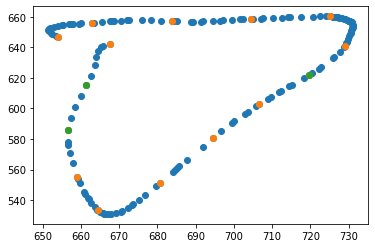

sub_counter: 3


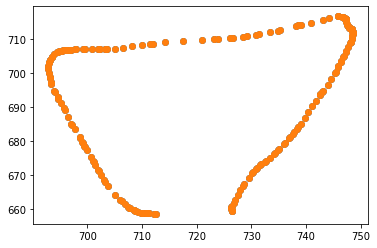

sub_counter: 0


3

In [134]:
# Make it simple - Need to fix

# functions
def get_angle(x1, y1, x2, y2):
    if (x1 == x2):
        if y2 >= y1:
            return 90
        return -90
    
    return math.degrees(math.atan(y2-y1/x2-x1))

def get_distance(x1, y1, x2, y2):
    return math.sqrt(math.pow(x2-x1, 2) + math.pow(y2-y1, 2))

def get_next_block(sub_df: pd.DataFrame, current, distance: float):
    if current not in sub_df.index.tolist():
        return None
            
    x2, y2 = x1, y1 = sub_df.iloc[current][['X', 'Y']]
    
    for i in range(current+1, len(sub_df)):
        x2, y2 = df.iloc[i][['X', 'Y']]
        if get_distance(x1, y1, x2, y2) >= distance:
            return i
    return len(sub_df) - 1

# Flags
DELTA_XY = 20
ANGLE_DIFF = 0.5

def count_lines_in_sub_draw(sub_df):
    # savers
    counter = 0

    con_x, con_y = [], []

    # Step 1
    si = [0]
    start_index = 0

    end_index = get_next_block(sub_df, start_index, DELTA_XY)
    
    while start_index < end_index:
        si.append(end_index)
        x1, y1 = sub_df.iloc[start_index][['X', 'Y']]

        start_index = end_index
        end_index = get_next_block(sub_df, start_index, DELTA_XY)

    si.append(sub_df.tail(1).index[0])

    si = np.unique(np.array(si)).tolist()

    # Step 2
    for i in range(len(si)-2):
        x1, y1 = sub_df.iloc[si[i]][['X', 'Y']]

        deg = math.degrees(math.atan(y1/x1))
        a = b = 0
        
        way = range(si[i], si[i+1] + 1)

        for row_i in way:
            row = sub_df.iloc[row_i]

            x2, y2 = row[['X', 'Y']]
            a += math.degrees(math.atan(y2/x2)) - deg

        a /= len(way)

        way = range(si[i], si[i+2] + 1)
        for row_i in way:
            row = sub_df.iloc[row_i]

            x2, y2 = row[['X', 'Y']]
            b += math.degrees(math.atan(y2/x2)) - deg

        b /= len(way)

        if abs(b - a) > ANGLE_DIFF:
            counter += 1
            con_x.append(x1)
            con_y.append(y1)


    plt.scatter(sub_df['X'], sub_df['Y']) # all
    plt.scatter(sub_df.iloc[si]['X'], sub_df.iloc[si]['Y']) # blocks
    plt.scatter(con_x, con_y) # counted
    plt.show()

    return counter

counter = 0

limits = [df.head(1).index[0], df.tail(1).index[0]] + df[df.TimeDiff > df.TimeDiff.std()].index.tolist()
limits = np.unique(list(sorted(limits))).tolist()

index = 0

for i in range(len(limits) - 1):
    start = limits[i]
    end = limits[i+1]
    
    sub_df = df.iloc[start:end].copy()
    sub_df.index = range(len(sub_df.index))
    
    sub_df = sub_df.iloc[1:]
    sub_df.index = range(len(sub_df.index))
        
    sub_counter = count_lines_in_sub_draw(sub_df)
    print('sub_counter: ' + str(sub_counter))
        
    counter += sub_counter

counter

In [135]:
sub_df

,X,Y,Pressure,TiltX,TiltY,Time,TimeDiff,PressureDiff,XDiff,YDiff,TiltXDiff,TiltYDiff
0,726.419217,659.643839,0.091783,4325.0,-378.0,6.407096,0.015619,0.017334,0.000000,0.000000,0.0,0.0
1,726.419217,659.643839,0.109117,4325.0,-378.0,6.422715,0.015732,0.059083,-0.052662,0.263310,-122.0,16.0
2,726.366555,659.907149,0.168200,4203.0,-362.0,6.438447,0.015518,0.071778,-0.052662,0.315972,-116.0,15.0
3,726.313893,660.223120,0.239979,4087.0,-347.0,6.453965,0.015622,0.042481,0.000000,0.315972,0.0,0.0
4,726.313893,660.539092,0.282460,4087.0,-347.0,6.469587,0.019627,0.034913,0.210648,0.526620,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,710.673288,658.906571,0.748287,3730.0,-885.0,8.565296,0.000000,-0.004883,0.315972,-0.052662,0.0,0.0
196,710.989260,658.853909,0.743404,3730.0,-885.0,8.565296,0.015665,-0.008545,0.315972,-0.052662,0.0,0.0
197,711.305232,658.801247,0.734859,3730.0,-885.0,8.580961,0.000000,-0.027588,0.895253,-0.157986,5.0,38.0
198,712.200485,658.643261,0.707271,3735.0,-847.0,8.580961,0.015581,-0.014160,0.315972,0.000000,0.0,0.0
